<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_Bernstein%E2%80%93Vazirani__01_GoogleAIStudio_mkbahk_20250723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=7e926bf493fa375302133fc0aeec0d2b7d776953003e7761a07a88158562fb90
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 71.4 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-logeckq0
  Running comman

In [2]:
# 1. 필요한 라이브러리 가져오기
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 2. 숨겨진 문자열(secret string) 설정
# 이 문자열을 알고리즘을 통해 찾아낼 것입니다.
secret_string = '10110'
n = len(secret_string)

# 3. 양자 회로 생성
# n개의 입력 큐비트와 1개의 보조 큐비트, 총 n+1개의 큐비트가 필요합니다.
# 측정 결과를 저장할 n개의 고전 비트도 필요합니다.
circuit = QuantumCircuit(n + 1, n)

# 4. 초기화 단계
# 입력 큐비트(0부터 n-1까지)에 아다마르(H) 게이트를 적용하여 중첩 상태를 만듭니다.
circuit.h(range(n))

# 보조 큐비트(n번째)를 |-> 상태로 만듭니다. (X 게이트 -> H 게이트)
circuit.x(n)
circuit.h(n)

# 회로의 구분을 위해 장벽(barrier)을 추가합니다.
circuit.barrier()

# 5. 오라클(Oracle) 구현
# 숨겨진 문자열의 각 비트가 '1'인 위치에 해당하는 입력 큐비트를 제어 큐비트(control qubit)로,
# 보조 큐비트를 목표 큐비트(target qubit)로 하는 CNOT 게이트를 적용합니다.
# Qiskit은 비트 순서가 반대이므로 secret_string을 뒤집어서 사용합니다.
for i, bit in enumerate(reversed(secret_string)): ## Qiskit 출력 비트순서가 큰->작은 순으로 표시되서 편하게 보기 위해 바꿉니다.
    if bit == '1':
        circuit.cx(i, n)
    ###if
###for

# 다시 장벽을 추가합니다.
circuit.barrier()

# 6. 마무리 단계
# 입력 큐비트들에 다시 아다마르(H) 게이트를 적용합니다.
circuit.h(range(n))

# 7. 측정
# 입력 큐비트들을 측정하여 결과를 고전 비트에 저장합니다.
circuit.measure(range(n), range(n))

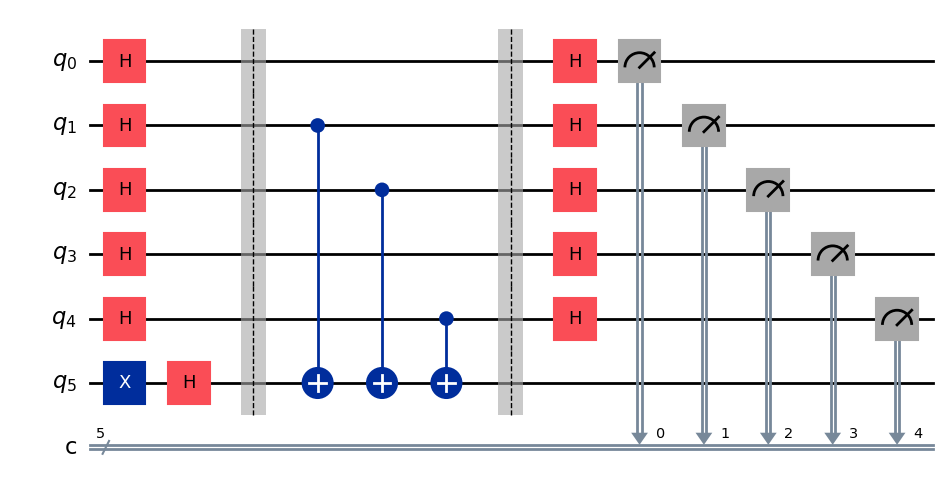

In [7]:
# 8. 회로 시각화 (텍스트 형식)
circuit.draw('mpl')

In [ ]:
# 9. Aer 시뮬레이터로 회로 실행
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)

In [11]:
# 알고리즘은 단 한 번의 실행(shot=1)으로 결과를 찾지만,
# 시뮬레이션에서는 1024번 실행하여 통계적으로 100% 확률을 확인합니다.
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(circuit)

In [12]:
# 10. 결과 출력
print("\n--- 시뮬레이션 결과 ---")
print("측정된 결과:", counts)
print(f"찾아낸 숨겨진 문자열: {list(counts.keys())[0]}")
print(f"원래 숨겨진 문자열: {secret_string}")


--- 시뮬레이션 결과 ---
측정된 결과: {'10110': 1024}
찾아낸 숨겨진 문자열: 10110
원래 숨겨진 문자열: 10110


측정 결과: {'10110': 1024}


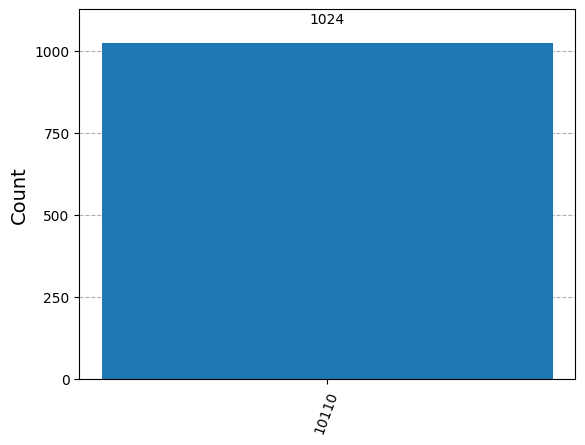

In [13]:
# 결과 출력
print("측정 결과:", counts)
plot_histogram(counts)